## SPY_2011_22 변동성 시각화하기

In [1]:
import datetime
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
variableName = 'S&P 500'

### ① 데이터 불러오기

In [3]:
f = yf.download('SPY', start='2011-01-03', end='2022-12-30')
f = f[['Adj Close']]
f = f.dropna()
f.columns = [variableName]

[*********************100%***********************]  1 of 1 completed


### ② 수익률 구하기 /  ③ 결측값 제거하기

In [4]:
y = f.pct_change()  # 수익률 구하기
y = y.dropna()  # 결측값이 있는 row/column 제거

### ④ 데이터 시리즈로 변경하기 / ⑤ Mean(평균) 제거하기

In [5]:
#change DataFrame to DataSeries *데이터 프레임을 데이터 시리즈로 변경
y = y[variableName]
y -= np.mean(y)       # remove the mean *mean 제거

### ⑥ 전체 기간 plot 그리기

In [6]:
import matplotlib.pyplot as plt

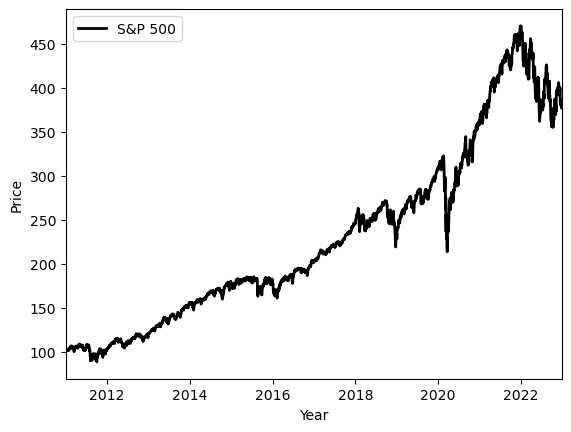

In [7]:
plt.plot(f, label=variableName, color="black", linewidth=2.0, linestyle="-")  # linewidth: 그래프 선 굵기 조정, linestyle: 선 종류 지정
plt.legend([variableName])  # legend(): 범례 표시 = 데이터의 종류를 표시하기 위한 텍스트
plt.ylabel('Price')
plt.xlabel('Year')
plt.xlim([datetime.date(2011, 1, 3), datetime.date(2022, 12, 30)])
plt.show()

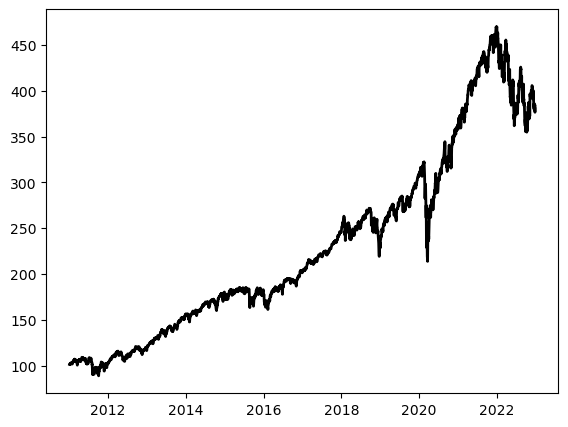

In [8]:
# 그래프 잘 보이게 양옆 위아래 띄어서 Plot 그리기

fig = plt.figure()  # 새로운 figure 생성
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes  # add_axes(): 각각의 상대적인 위치 지정, 모든 값은 1 미만
# 첫 0.1은 이미지의 x축의 위치, 두번째 0.1은 이미지의 y축의 시작위치, 세번째 0.8은 이미지의 가로길이, 네번째 0.8은 높이를 의미한다.
ax.plot(f, label=variableName, color="black", linewidth=2.0, linestyle="-")

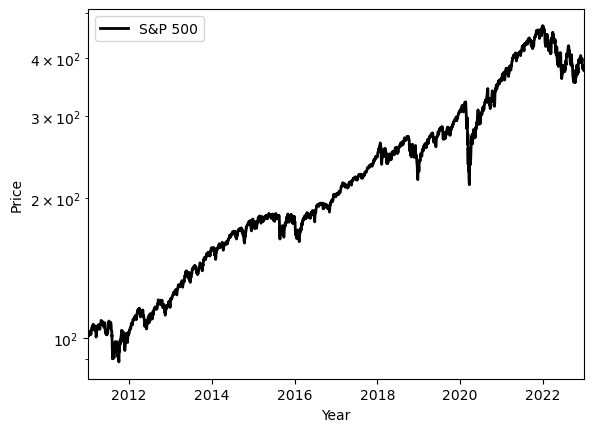

In [9]:
# log를 사용하여 그래프 경사를 완만하게 그리기

plt.plot(f, label=variableName, color="black", linewidth=2.0, linestyle="-")  # linewidth: 그래프 선 굵기 조정, linestyle: 선 종류 지정
plt.legend([variableName])  # legend(): 범례 표시 = 데이터의 종류를 표시하기 위한 텍스트
plt.yscale("log")
plt.ylabel('Price')
plt.xlabel('Year')
plt.xlim([datetime.date(2011, 1, 3), datetime.date(2022, 12, 30)])
plt.show()

In [10]:
ylabels=[100,250,500,1000,2000,3000]
ax.set_yticks(ylabels)  # set_yticks(): 눈금 설정
ax.set_yticklabels(ylabels)  # set_yticklabels(): 눈금 이름 설정

[Text(0, 100, '100'),
 Text(0, 250, '250'),
 Text(0, 500, '500'),
 Text(0, 1000, '1000'),
 Text(0, 2000, '2000'),
 Text(0, 3000, '3000')]

In [11]:
plt.show()

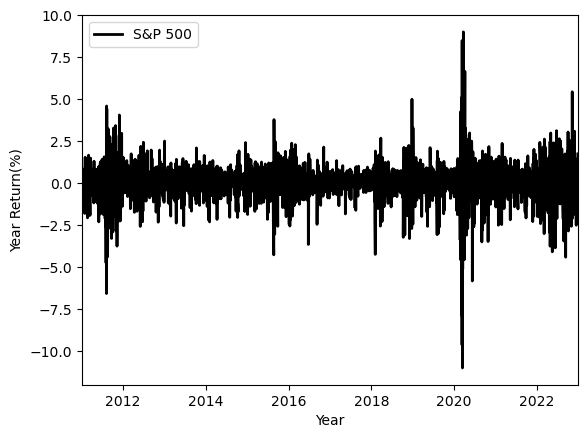

In [12]:
# 년(Year) 빈도(주기)?
plt.plot(y*100, label=variableName, color="black", linewidth=2.0, linestyle="-")
plt.legend([variableName])
plt.ylabel('Year Return(%)')
plt.xlabel('Year')
plt.xlim([datetime.date(2011, 1, 3), datetime.date(2022, 12, 30)])
plt.show()

### ⑦ Resampling 해서 월별/연간 가격 변동 시각화하기

In [13]:
# 일일 데이터를 월별, 연간 빈도로 다시 샘플링
f_month_beg = f.resample('BMS').first()  # resample(): Datetime Index를 원하는 주기로 나누어주는 메서드
f_month_end = f.resample('BM').last()

- BMS: 매 월(M) 첫째날만 가져오기
- BM: 매 월 마지막날만 가져오기

In [14]:
f_month_beg

,S&P 500
Date,
2011-01-03,101.109337
2011-02-01,104.045898
2011-03-01,104.197113
2011-04-01,106.424164
2011-05-02,108.877968
...,...
2022-08-01,407.219543
2022-09-01,392.993622
2022-10-03,364.934204


In [15]:
f_month_end

,S&P 500
Date,
2011-01-31,102.406525
2011-02-28,105.963837
2011-03-31,105.976562
2011-04-29,109.045784
2011-05-31,107.822884
...,...
2022-08-31,391.764313
2022-09-30,355.547302
2022-10-31,384.444611


In [16]:
f_year_beg = f.resample('BYS').first()
f_year_end = f.resample('BY').last()

- BYS: 매 년(Y) 첫째달(1월)의 첫째날만 가져오기
- BY: 매 년(Y) 마지막달(12월)의 마지막날만 가져오기

In [17]:
f_year_beg

,S&P 500
Date,
2011-01-03,101.109337
2012-01-02,103.596191
2013-01-01,121.308128
2014-01-01,154.989502
2015-01-01,177.463623
2016-01-01,177.237396
2017-01-02,202.856537
2018-01-01,246.766602
2019-01-01,234.061584


In [18]:
f_year_end

,S&P 500
Date,
2011-12-30,101.971153
2012-12-31,118.276733
2013-12-31,156.489258
2014-12-31,177.558594
2015-12-31,179.750214
2016-12-30,201.316452
2017-12-29,245.012985
2018-12-31,233.818359
2019-12-31,306.825470


[Pandas]DataFrame 시간간격 재조정(Resampling)  
https://seong6496.tistory.com/85

In [19]:
# 월/연말 데이터를 기반으로 변경 사항 계산
y_month_end = f_month_end.pct_change()  # pct_change(): 한 객체 내에서 행과 행의 차이를 현재값과의 백분율로 출력 = 수익률 출력
y_month_end = y_month_end.dropna()
y_month_end = y_month_end[variableName]
y_month_end  -= np.mean(y_month_end)       # remove the mean

In [20]:
y_year_end = f_year_end.pct_change()
y_year_end = y_year_end.dropna()
y_year_end = y_year_end[variableName]
y_year_end  -= np.mean(y_year_end)       # remove the mean

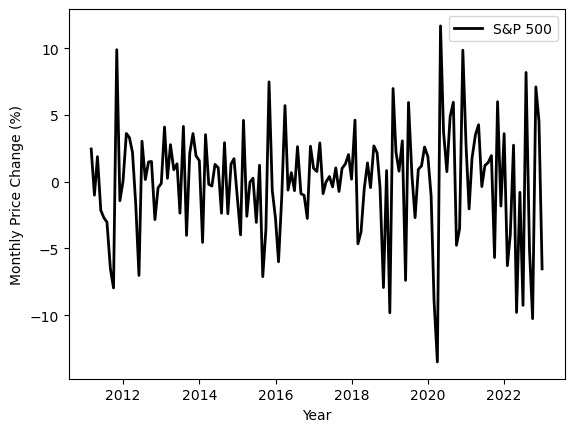

In [21]:
# 월별 가격 변동
plt.plot(y_month_end*100, label=variableName, color="black", linewidth=2.0, linestyle="-")  # 백분율을 볼 거라서 *100 해주는 것
plt.legend([variableName])
plt.ylabel('Monthly Price Change (%)')
plt.xlabel('Year')
plt.show()

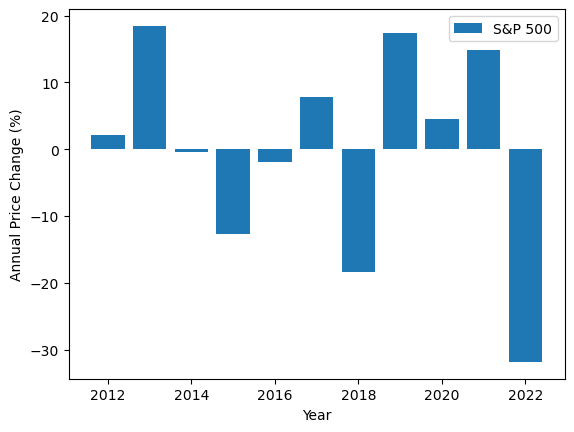

In [22]:
# 연간 가격 변동
plt.bar(y_year_end.index.year, y_year_end*100)
plt.legend([variableName])
plt.ylabel('Annual Price Change (%)')
plt.xlabel('Year')
plt.show()

### ⑧ 기본 요약 통계 출력하기

In [23]:
import numpy as np

In [24]:
print(sum(y))          # y의 모든 원소의 합
print(max(y))          # y의 최대값
print(min(y))          # y의 최소값
print(np.mean(y))      # 산술 평균
print(np.median(y))    # 중앙값
print(np.var(y))       # 분산
print(np.cov(y))       # covar matrix 코바 행렬 = 단일 벡터에 대한 분산
print(np.corrcoef(y))  # corr matrix = [1] for single vector
#print(np.sort(y))      # 오름차순 정렬
#print(np.log(y))       # natural log

-2.185751579730777e-15
0.09009979914634272
-0.10992705882789441
5.058173157255104e-20
0.00014006457316998388
0.00012279992881514913
0.00012284063147634057
1.0


### ⑨ 분산, 비대칭, 과잉 첨도 출력하기

In [25]:
from scipy import stats

In [26]:
print(stats.skew(y))                     # skewness 비대칭
print(stats.kurtosis(y))                # 과잉 첨도
# *첨도: 도수 곡선의 최빈치를 중심으로 하는 부분의 완만함·뾰족함의 정도를 나타내는 수치.
    # 그래프의 뾰족함을 나타내기 위해??

-0.5487007759843141
11.558358654577843


In [27]:
def excess_kurtosis(x, excess = 3):        # 참고: excess 옵션(선택 사항), default = 3
    m4=np.mean((x-np.mean(x))**4)          # 참고: Python에서는 exponentiation를 **로 사용하여 표현(?)한다.
    excess_kurt=m4/(np.std(x)**4)-excess
    return excess_kurt

In [28]:
def moment(x, n):        # 참고: nth moment 계산
    if n==1:
        return np.mean(x)
    elif n==2:
        return np.var(x)
    else:
        return np.mean((x-np.mean(x))**n)/(np.std(x)**n)

In [29]:
print(excess_kurtosis(y))

11.558358654577802


In [30]:
print(moment(y,1))          # 평균
print(moment(y,2))          # 분산
print(moment(y,3))          # 비대칭
print(moment(y,4))          # 첨도

5.058173157255104e-20
0.00012279992881514913
-0.548700775984313
14.558358654577802


### ⑩ QQ Plot 그리기

QQ Plot을 그리는 이유는 정규 분포에 따르는지 보기 위해서이다.  
파란색(데이터) 그래프가 빨간색과 일치하거나 비슷할 수록 정규 분포를 따른다고 볼 수 있다.

In [31]:
from statsmodels.graphics.gofplots import qqplot

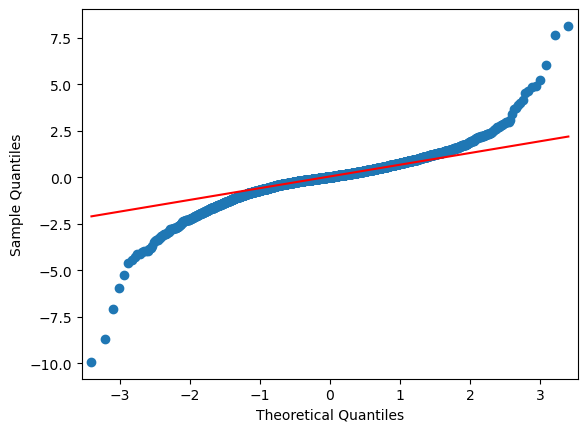

In [32]:
# 정규 분포 확인
fig1 = qqplot(y, line='q', dist = stats.norm, fit = True)  # dist 옵션: 정규 분포가 아닌 다른 분포와 비교해보기          
plt.show()
plt.close()  # Figure를 지우고 창을 닫으므로 스크립트는 출력을 생성하지 않는다. = 자동으로 창 닫기

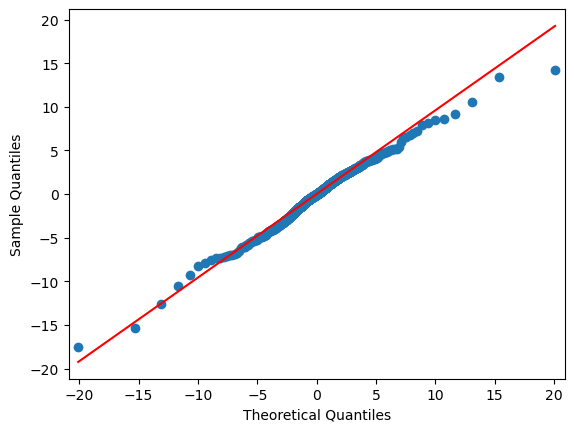

In [33]:
# t 분포 확인
fig2 = qqplot(y, line='q', dist = stats.t, distargs=(5,), fit = True)
plt.show()
plt.close()

### ⑪ 변동성을 추정하는 MA Model

In [34]:
import pandas as pd
import matplotlib.ticker as ticker

In [35]:
WE = 20
T = len(y)

In [36]:
volUnconditional = np.std(y, ddof=1) *np.sqrt(252)
# std(): 배열에있는 모든 값의 표준 편차 계산 / sqrt(): 괄호 안의 수의 제곱근을 계산
# ddof=1 옵션: 무한 모집단 분산의 편향되지 않은 추정치를 제공합니다.
# ddof=0 옵션: 정규 분포 변수에 대한 분산의 최대 우도 추정치를 제공합니다.

In [37]:
vols = np.zeros(T)  # zeros(): 0으로만 채워진 array 생성

In [38]:
for t in range(WE,T):
    t1 = t-WE
    window = y[t1:t]      # window 견적
    vols[t] = np.std(window, ddof=1) *np.sqrt(252)

In [39]:
volMA = pd.Series(vols[WE:], index=y.index[WE:])  # Series 생성
volMA.name = 'Vol (MA)'

In [40]:
def plotVol(volData, volUncond, type):
    
    if type == 'plot':  # type이 plot이면 plot 그리기
        plt.plot(volData)
    elif type == 'bar':  # type이 bar이면 bar 그리기
        plt.bar(volData.index, volData, width=40/len(volData))
                
    plt.xlabel('Year')
    plt.ylabel('Volatility (%)')  # 변동성
    plt.axhline(y = volUncond, color='r', linestyle='-', linewidth = 6)  # 특정 위치에 수직선 혹은 수평선을 그리기
    

    plt.gca().yaxis.set_major_formatter(
            ticker.PercentFormatter(xmax=1, decimals=0))
    plt.title(volData.name)    
    plt.show()

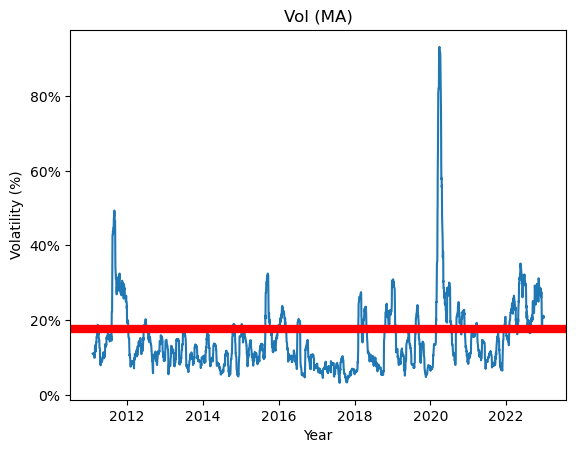

In [41]:
plotVol(volMA, volUnconditional, 'plot')

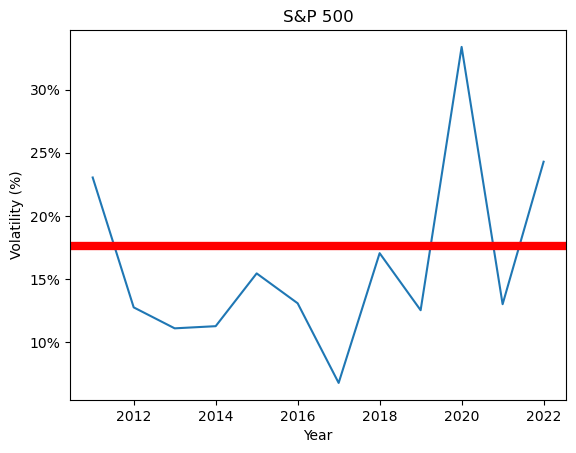

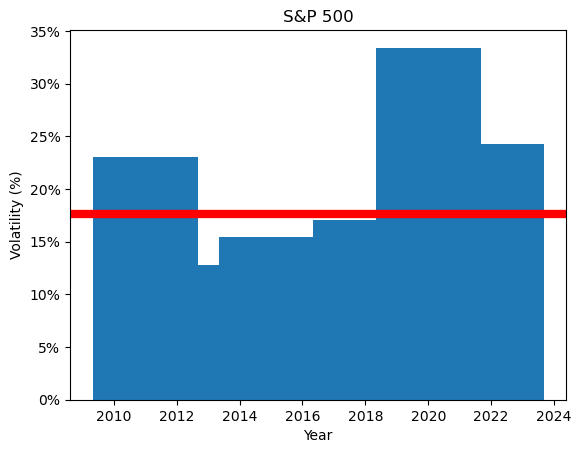

In [42]:
vol_annual = y.groupby(y.index.year).agg(np.std)*np.sqrt(252)
# groupby(): 데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도로 데이터를 처리(혹은 적용)하거나 그룹별 통계량을 확인
# agg(): 다중 집계 작업을 간결하게 나타내기 = 여러 함수를 동시에 입력/출력 가능
plotVol(vol_annual, volUnconditional, 'plot')
plotVol(vol_annual, volUnconditional, 'bar')

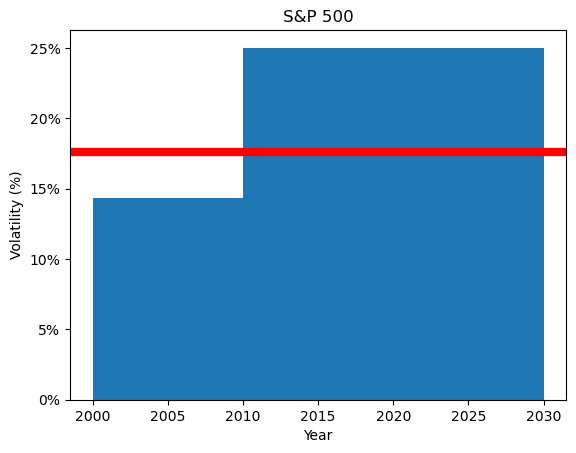

In [43]:
vol_decades = y.groupby(y.index.year//10).agg(np.std)*np.sqrt(252)
vol_decades.index *= 10
plotVol(vol_decades, volUnconditional, 'bar')

판다스(Pandas) .groupby()로 할 수 있는 거의 모든 것! (통계량, 전처리)  
https://teddylee777.github.io/pandas/pandas-groupby  
다수(여러개)의 함수 사용을 위한 agg() 메서드  
https://kongdols-room.tistory.com/168

### ⑫ 지수가중평균(EWMA) 변동성

지수가중평균(EWMA) 변동성 개념  
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=61stu01&logNo=221282667120

In [44]:
T = len(y)
EWMA = np.zeros(T)  # 0으로 채워진 array 생성

In [45]:
lmbda = 0.94

In [46]:
S = np.var(y)  # 배열 요소의 분산 계산

In [47]:
for i in range(1,T):
    S = lmbda * S + (1-lmbda) * y[i-1]**2
    EWMA[i] = np.sqrt(S)*np.sqrt(252)

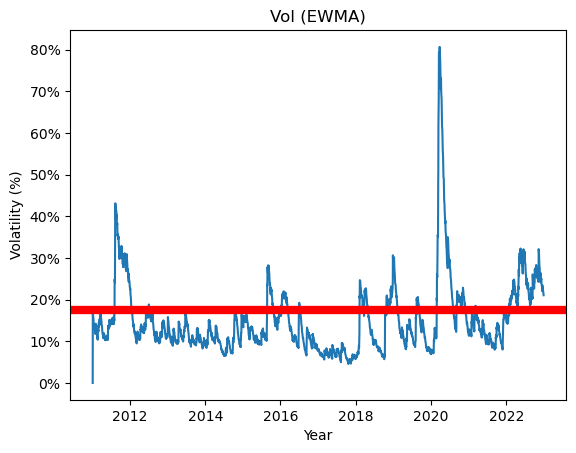

In [48]:
volEWMA = pd.Series(EWMA, y.index)
volEWMA.name = 'Vol (EWMA)'
plotVol(volEWMA, volUnconditional, 'plot')

### ⑬ 분포 적합선, QQ Plot, 히스토그램 그리기

In [49]:
import scipy.stats as sps

In [50]:
NumS = 10000

In [51]:
y *= 100            # 백분율로 변환
# 첫 번째 정규 분포를 fit시킵니다
mu, sigma = sps.norm.fit(y)
print('Normal distribution fit parameters: mu = {:6.3f}, sigma = {:6.3f}'.format(mu, sigma))
# student t fit
df, loc, scale = sps.t.fit(y)
# 정규 분포 적합 모수
print('Normal distribution fit parameters: \
      df = {:6.3f}, loc = {:6.3f}, scale = {:6.3f}'.format(df, loc, scale))

Normal distribution fit parameters: mu = -0.000, sigma =  1.108
Normal distribution fit parameters:       df =  2.580, loc =  0.039, scale =  0.628


Student's t-distribution  
https://en.wikipedia.org/wiki/Student%27s_t-distribution  
https://m.blog.naver.com/mykepzzang/220853827288

In [52]:
# QQ plot
from statsmodels.graphics.gofplots import qqplot

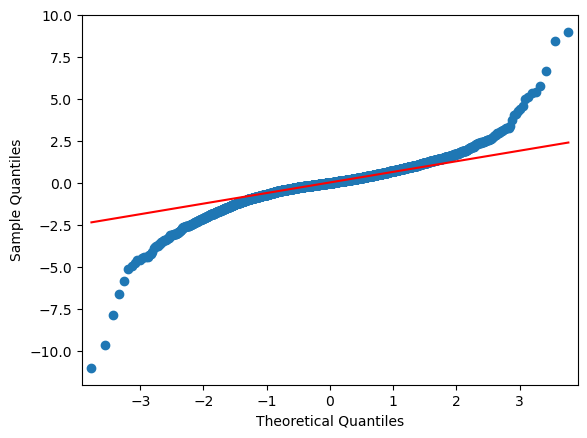

In [53]:
# sps.norm: 정규 분포 확인
fig1 = qqplot(y, line='q', dist = sps.norm, loc = mu, scale = sigma)               
plt.show()
plt.close()

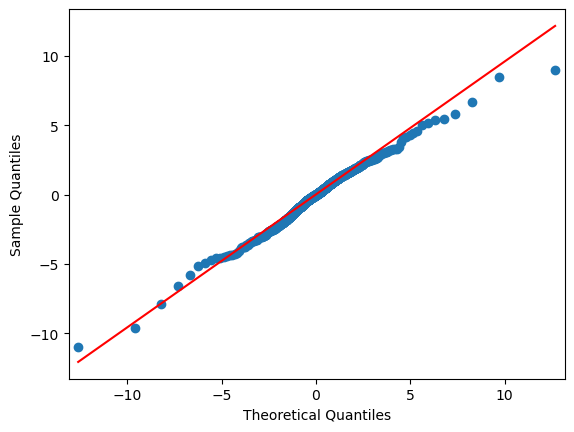

In [54]:
# sps.t: t 분포 확인
fig2 = qqplot(y, line='q', dist = sps.t, distargs=(df,), 
              loc = loc, scale = scale)
plt.show()
plt.close()

In [55]:
# 정규 분포를 기반으로 한 시뮬레이션
yn = sps.norm.rvs(mu, sigma, size = NumS)  # norm: 가우시안 정규 분포 / rvs: 랜덤 샘플 생성 

In [56]:
# t 분포를 기반으로 한 시뮬레이션
yt = sps.t.rvs(df, loc, scale, size = NumS)

SciPy를 이용한 확률 분포 분석  
https://namyoungkim.github.io/scipy/probability/2017/09/04/scipy/

In [57]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')  # matplotlib에서 사용할 수 있는 스타일시트 중 seaborn-deep 사용

C:\Users\wips\AppData\Local\Temp\ipykernel_5860\612802579.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')  # matplotlib에서 사용할 수 있는 스타일시트 중 seaborn-deep 사용


In [58]:
bins = np.linspace(-10, 10, 30)  # 구간 내에 숫자 채우기
# np.linspace(구간 시작점, 구간 끝점, 구간 내 숫자 개수)

[Numpy] 파이썬 넘파이 np.linspace 함수(구간 내에 숫자 채우기)  
https://jimmy-ai.tistory.com/41

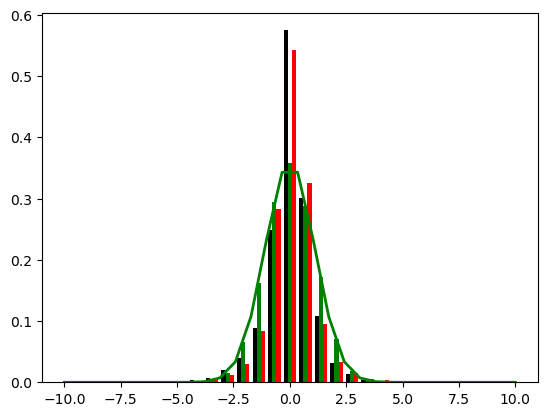

In [59]:
# 히스토그램 그리기
count, bins, ignored = plt.hist([y, yn, yt], bins,
         label=['Actual', 'Normal','t Dist'], 
         color = ['k', 'g', 'r'], density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='g')

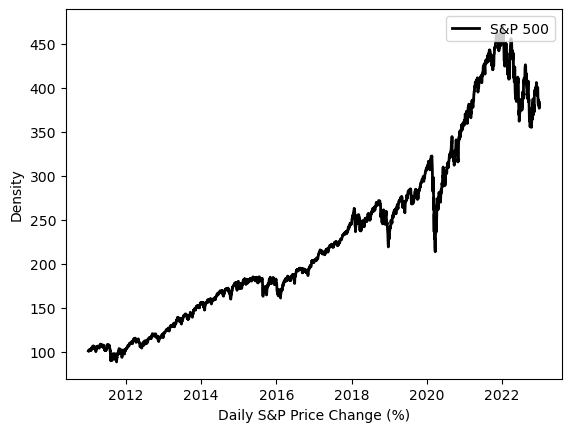

In [60]:
plt.plot(f, label=variableName, color="black", linewidth=2.0, linestyle="-")  # linewidth: 그래프 선 굵기 조정, linestyle: 선 종류 지정
plt.legend(loc='upper right')  # 범례 작성
plt.xlabel('Daily S&P Price Change (%)')  # 일별 S&P 가격 변동
plt.ylabel('Density')
plt.show()

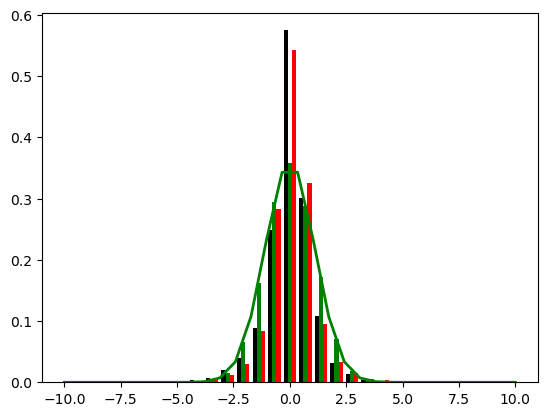

In [61]:
count, bins, ignored = plt.hist([y, yn, yt], bins, 
        label=['Actual', 'Normal','t Dist'], 
        color = ['k', 'g', 'r'], density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='g')

### ⑭ Subplot 예제

In [62]:
import matplotlib.pyplot as plt

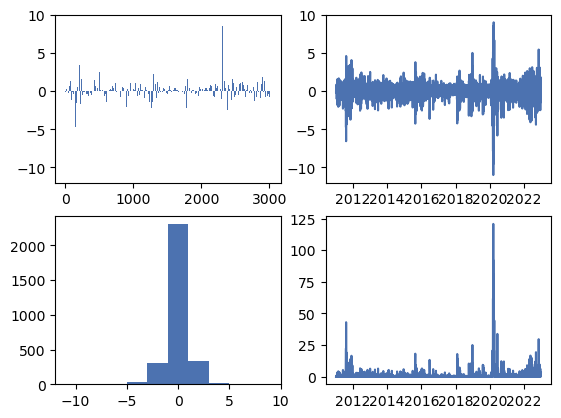

In [63]:
# plt.figure(figsize=(10,10))
plt.figure(2)
plt.subplot(2,2,1)
plt.bar(range(len(y)), y)
plt.subplot(2,2,2)
plt.plot(y)
plt.subplot(2,2,3)
plt.hist(y)
plt.subplot(2,2,4)
plt.plot(y**2)
plt.show()